In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'E:\\4th-Year\\DATA-301\\DATA-301-Directory\\course-project-group_1052\\analysis\\Thomas'

In [3]:
os.chdir('E:\\4th-Year\\DATA-301\\DATA-301-Directory\\course-project-group_1052')
from analysis.scripts import project_functions_Tom as pf

In [4]:
df = pf.load_and_process('data/raw/KB_censored-lyrics.csv')
df

,ogArtist,badWord,count,category,year,isCensored,isPresent
244,Christina Aguilera,sex,1,sexual,2001,1,1
831,Len,man,1,identity,2001,1,1
832,LFO,hip,2,sexual,2001,1,1
67,Aaliyah,freak,1,sexual,2002,1,1
126,Baha Men,woman,3,identity,2002,1,1
...,...,...,...,...,...,...,...
386,Ed Sheeran,cigarette,1,alcohol & drugs,2019,1,1
385,Ed Sheeran,bottle,1,alcohol & drugs,2019,1,1
384,Ed Sheeran,bar,3,alcohol & drugs,2019,1,1
382,Ed Sheeran,bar,1,alcohol & drugs,2019,1,1


### Number of unique swear words

In [5]:
df['badWord'].nunique()

167

### Total number of samples

In [6]:
df['badWord'].count()

1353

### Counting the number of bad words total in the dataframe

In [7]:
dfBadWord_count = pf.badword_count(df)
dfBadWord_count.head(20)

,badWord,frequency
0,fuck,89
1,shit,77
2,damn,68
3,man,57
4,kiss,53
5,bitch,39
6,god,34
7,drink,33
8,body,31
9,touch,31


### Creating a visualization

Text(0.5, 0, 'Frequency (count)')

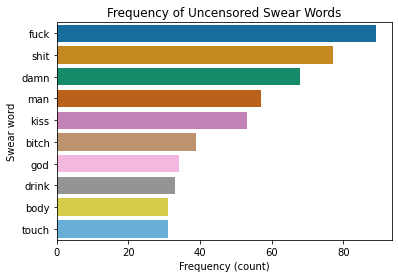

In [8]:
sns.countplot(data = df,
              y = 'badWord',
              order = df['badWord'].value_counts().iloc[:10].index,
              palette = 'colorblind'
             )
plt.title('Frequency of Uncensored Swear Words')
plt.ylabel('Swear word')
plt.xlabel('Frequency (count)')

### Which artist has the most diverse use of swear words?

In [9]:
df_unique = pd.DataFrame(pf.unique_word_count(df)).reset_index()
df_unique = df_unique[df_unique['badWord'] > 15]
df_unique

,ogArtist,badWord
0,Katy Perry,25
1,Ed Sheeran,23
2,Taylor Swift,22
3,Maroon 5,19
4,Flo Rida,18
5,Macklemore & Ryan Lewis,18
6,Bruno Mars,16
7,DJ Khaled,16
8,Drake,16


### Visualization

Text(0.5, 0, 'Artist')

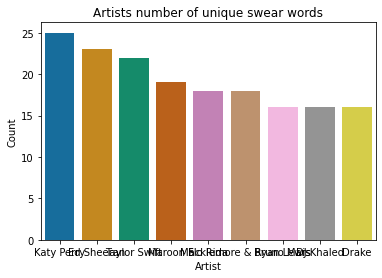

In [10]:
sns.barplot(data = df_unique,
              y = 'badWord',
              x = 'ogArtist',
              palette = 'colorblind'
             )
plt.title('Artists number of unique swear words')
plt.ylabel('Count')
plt.xlabel('Artist')

### Top 5 swear words over time

In [11]:
df_word_count = pf.words_per_year_T4(df)
df_word_count

,badWord,year,count
0,fuck,2019,32
1,shit,2018,15
2,kiss,2015,13
3,fuck,2013,11
4,fuck,2016,10
...,...,...,...
63,kiss,2008,1
64,fuck,2009,1
65,shit,2014,1
66,shit,2015,1


### Visualization

Text(0.5, 0, 'Time (years)')

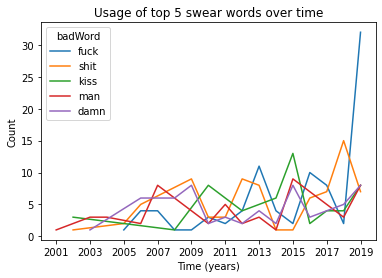

In [12]:
sns.lineplot(data=df_word_count, x='year', y='count', hue = "badWord")
plt.xticks(range(2001,2020,2))
plt.title('Usage of top 5 swear words over time')
plt.ylabel('Count')
plt.xlabel('Time (years)')